In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MeCab
import seaborn as sb
%matplotlib inline

In [1]:
import tensorflow as tf

In [5]:
m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ko-dic')

In [6]:
m.parse("u[재]★한번만봐도엄청난먹방!그녀는The디바!유튜브구독필수!")

'u\tSL,*,*,*,*,*,*,*,*\n[\tSSO,*,*,*,*,*,*,*,*\n재\tXPN,*,F,재,*,*,*,*,*\n]\tSSC,*,*,*,*,*,*,*,*\n★\tSY,*,*,*,*,*,*,*,*\n한\tMM,~가산명사,T,한,*,*,*,*,*\n번\tNNBC,*,T,번,*,*,*,*,*\n만\tJX,*,T,만,*,*,*,*,*\n봐도\tVV+EC,*,F,봐도,Inflect,VV,EC,보/VV+아도/EC,*\n엄청난\tVA+ETM,*,T,엄청난,Inflect,VA,ETM,엄청나/VA+ᆫ/ETM,*\n먹방\tNNG,*,T,먹방,Compound,*,*,먹+방,먹/NNG/*/1/1+먹방/Compound/*/0/2+방/NNG/*/1/1\n!\tSF,*,*,*,*,*,*,*,*\n그녀\tNP,*,F,그녀,*,*,*,*,*\n는\tJX,*,T,는,*,*,*,*,*\nThe\tSL,*,*,*,*,*,*,*,*\n디바\tNNP,지명,F,디바,*,*,*,*,*\n!\tSY,*,*,*,*,*,*,*,*\n유튜브\tNNP,*,F,유튜브,*,*,*,*,*\n구독\tNNG,*,T,구독,*,*,*,*,*\n필수\tNNG,*,F,필수,*,*,*,*,*\n!\tSF,*,*,*,*,*,*,*,*\nEOS\n'

In [35]:
a = tf.placeholder("float")
b = tf.placeholder("float")
y = tf.mul(a, b)
sess = tf.Session()
print (sess.run(y, feed_dict={a: 3, b: 3}))

9.0


In [36]:
num_puntos = 2000
conjunto_puntos = []
for i in range(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

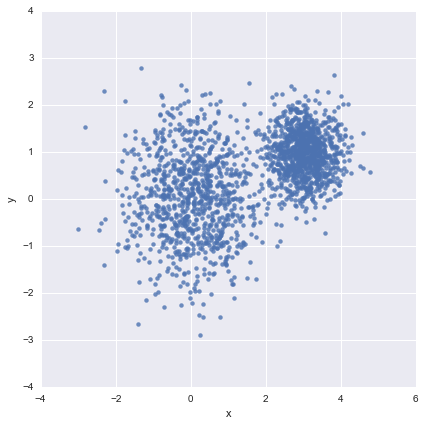

In [37]:
df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
        "y": [v[1] for v in conjunto_puntos]})
sb.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [51]:
v = tf.constant(conjunto_puntos)
k = 4
centroids = tf.Variable(tf.slice(tf.random_shuffle(v),[0,0],[k,-1]))

expand_v = tf.expand_dims(v,0)
expand_centroid = tf.expand_dims(centroids,1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expand_v, expand_centroid)),2),0)
means  = tf.concat(0, [tf.reduce_mean(tf.gather(v, tf.reshape(tf.where(tf.equal(assignments, c)),[1,-1])), reduction_indices=[1]) for c in range(k)])
update_centroids = tf.assign(centroids, means)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for step in range(1000):
        _, centroids_values, assignment_values = sess.run([update_centroids, centroids, assignment])

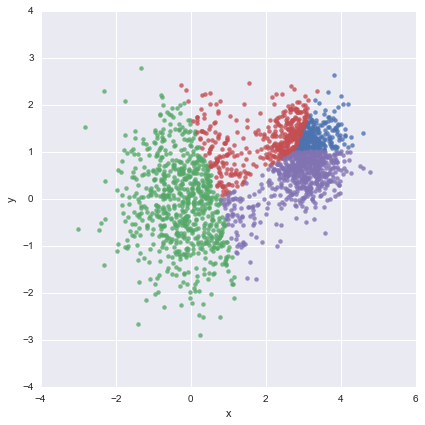

In [52]:
data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(conjunto_puntos[i][0])
    data["y"].append(conjunto_puntos[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sb.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()

In [53]:
centroids_values

array([[-0.91742921,  0.27791017],
       [ 0.56591415,  0.72470343],
       [ 0.29861096, -0.89682603],
       [ 3.02421951,  0.96779364]], dtype=float32)